#                                 PULSER STAR PREDICTION

## 1.Motivation

Pulser stars are very rare type of Neutron star  that produce radio emmission detectable on earth and they are of considerable interest as probes of space time and states of matter.

Their emission spreads across the sky and produces a detectable pattern of broadband radio emission.However in practice almost all detections are caused by radio frequency interference and noise,making legimat signals hard to find.

So we can predict whether a detected signal comes from a pulser star or from other sources such as noises,interference,etc.

## 2.Data Information

In this data,it is binary classification problem.That is ,1 implies true and 0 implies false.In this case 1 is pulser star and 0 is not pulser.

Each signal is decscribed by eight continuous variables and a single class varible.The first four are simple statistics obtained from the integrated pulse profile
and other remaining four varibles are similarly from the DM-SNR curve.

Variables are------>

 *Mean of the integrated profile
 
 *Standered deviation of the integrated profile
 
 *Excess Kurtosis of the integrated profile
 
 *Skewness of the integrated profile
 
 *Mean of the DM-SNR curve
 
 *Standered deviation of the DM-SNr curve
 
 *Excess kurtosis of the DM-Snr curve
 
 *Skewness of the DM-SNR curve

## 3.Dependences

We use the following libraries---->

numpy(np)/pandas(pd):Used to treat and explore the data and execute                        vector and matrix operations.

matplotlib/seaborn:can visualise by plotting the information.

sklearn:used to access to some tools to divide our dataset into training and testing and some tools for the modification of the data.
    
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 4.Data Exploration

In [2]:
data=pd.read_csv("pulsar_data.csv")
data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


## 5.Finding null values and datatypes of each features

In [3]:
print('         Null Values        ')
print("----------------------------")
print(data.isna().sum())
print("       ")
print("          Datatypes          ")
print("-----------------------------")
print(data.dtypes)

         Null Values        
----------------------------
 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64
       
          Datatypes          
-----------------------------
 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR cu

## 6.Replace feature names into short


In [56]:
data.columns=["Mean_profile","Std_profile","kurtosis_profile","Skewness_profile","Mean_DM_SNR","Std_DM_SNR","Kurtosis_DM_SNR","Skewness_DM_SNR","Target"]
data.head(10)

,Mean_profile,Std_profile,kurtosis_profile,Skewness_profile,Mean_DM_SNR,Std_DM_SNR,Kurtosis_DM_SNR,Skewness_DM_SNR,Target
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,26.351318,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,26.351318,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,26.351318,-0.700809,-1.200653,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0
8,95.007812,40.219805,0.347578,1.153164,2.770067,18.217741,7.851205,70.801938,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,26.351318,5.702532,36.342493,0.0


## 7.Fill the null values


In [57]:
data.isna().sum()

Mean_profile        0
Std_profile         0
kurtosis_profile    0
Skewness_profile    0
Mean_DM_SNR         0
Std_DM_SNR          0
Kurtosis_DM_SNR     0
Skewness_DM_SNR     0
Target              0
dtype: int64

In [59]:
#filling null values by finding the mean value from each coloumns.
mean1=data["kurtosis_profile"].mean()
print(mean1)
mean2=data["Std_DM_SNR"].mean()
print(mean2)
mean3=data["Skewness_DM_SNR"].mean()
print(mean3)

0.4785477494661291
26.35131816898556
105.52577900947786


In [60]:
data["kurtosis_profile"]=data["kurtosis_profile"].fillna(mean1)
data["Std_DM_SNR"]=data["Std_DM_SNR"].fillna(mean2)
data["Skewness_DM_SNR"]=data["Skewness_DM_SNR"].fillna(mean3)

## 8.statistical information

In [61]:
#giving a short discription aboue the data
data.describe()

,Mean_profile,Std_profile,kurtosis_profile,Skewness_profile,Mean_DM_SNR,Std_DM_SNR,Kurtosis_DM_SNR,Skewness_DM_SNR,Target
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,0.988230,6.208450,29.613230,18.666010,4.535783,104.686104,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.057820,-0.188142,1.910535,14.761144,5.803063,38.128424,0.000000
50%,115.183594,46.931022,0.289934,0.203317,2.792642,19.617161,8.451097,87.795533,0.000000
75%,127.109375,50.979103,0.478548,0.932374,5.413253,26.473142,10.727927,135.774973,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


## 9.Counting pulser stars and not pulser stars from the data

In [62]:
print("count of pulsers")
print('-----------------')
pulser=data[data["Target"]==1]
print(pulser["Target"].value_counts()[1])

count of pulsers
-----------------
1153


In [63]:
print("count of not pulsers")
print('-----------------')
Not_pulser=data[data["Target"]==0]
print(Not_pulser["Target"].value_counts()[0])

count of not pulsers
-----------------
11375


# 10. Data visualization

### 1.Pie plot between pulser and not pulser

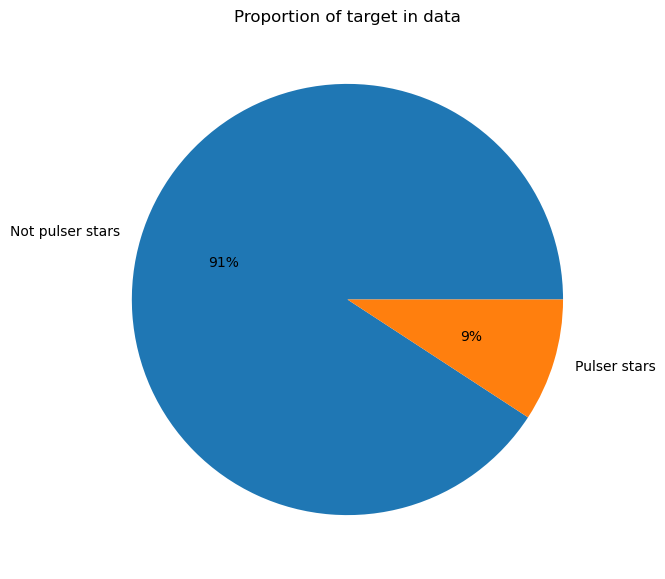

In [64]:
plt.figure(figsize=(7,7))
plt.pie(data["Target"].value_counts().values,labels=["Not pulser stars","Pulser stars"],autopct="%1.0f%%")
plt.title("Proportion of target in data")
plt.show()

Here we can see that 91% of stars are not pulser star.The remaining 9% is pulser.


### 2.Plot correlation matrix of features of data

A correlation matrix is simply a table which displays the correlation coefficients for diiferent variables.The matrix depicts the correlation between all the possible pairs of values in a table.

<AxesSubplot:>

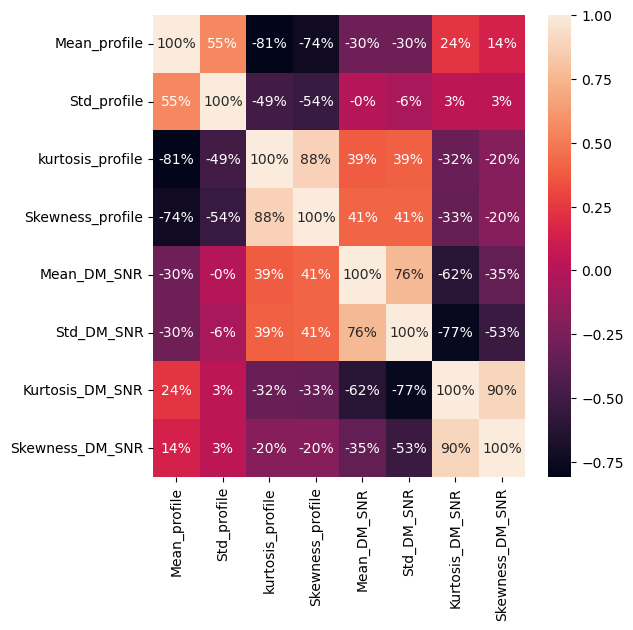

In [65]:
plt.figure(figsize=(6,6))
sns.heatmap(data.iloc[:,0:8].corr(),annot=True,fmt=".0%")

Something curious we can see frim this correlation matrix is that four of the eight features we have in our dataset correlate positively with our target variable while the other four correlate negetively,this is really going to help when training our model since the seperation between classes becomes clear.

### 3.Violinlplot of all features

A violin plot is a statistical representaton of numerical data.It is used to visualize the distribution of numerical data.It is hybrid of a box plot and a kenel density plot,which shows peaks in the data.

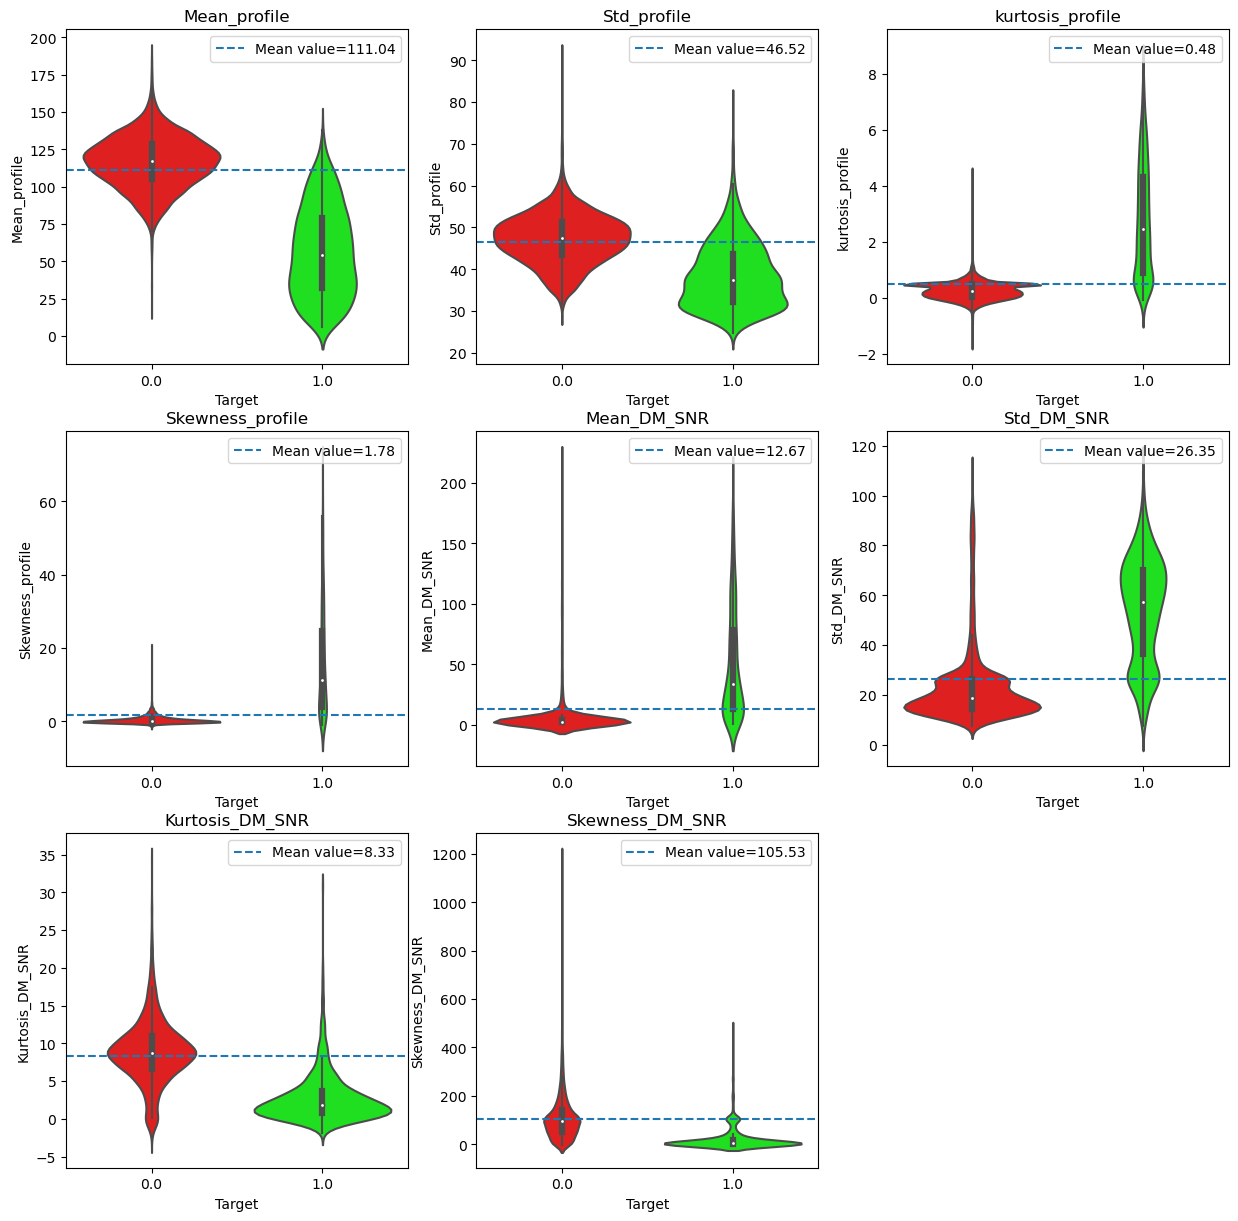

In [66]:
features=data.iloc[:,0:8]
plt.figure(figsize=(15,20))
j=0
for i in features:
    plt.subplot(4,3,j+1)
    sns.violinplot(x=data["Target"],y=data[i],palette=["red","lime"])
    plt.title(i)
    plt.axhline(data[i].mean(),linestyle="dashed",label="Mean value="+ str(round(data[i].mean(),2)))
    plt.legend(loc='best')
    j+=1
    

We are able to extract information about the distribution of values for each of the features of our database contain.Furthermore we can view these distribution for the different values our target variable has,plus having this dashed line being the mean value of the features might help us understand this data better.

*Mean_profile*: From the correlation matrix we observed the higher values the less change of the signal coming from a pulser star,in our violinplot we clearly see it.Additionally,by looking at the mean we could say that if a mean_profile value is above the mean value,that signal might probably to come from another source than a star.

*kurtosis_profile*: Like mean profile,this feature is also pretty intersting.We clearly observe how the majority of sambles whose kurtosis_profile value is above the mean value belong to the group of pulser stars while,with some outliers that break the rules,lower valuse than mean come from other signals.In addition,the distribution of values from the "non pulser" group is pretty similar,meaning the range of kurtosis_profile values for those signals is quite narrow and the opposite happens to the pulser group,values tend to be in a range between 0.48-8.

*skewness_profile*: From skewness_profile we can extract a quite interesting information.It actually seems weired the mean value  is just 1.77 when we have values higher than 60 in our dataset.The reason for that is that in our dataset we have approximately 10 times more "non_pulser" than actual pulser stars and the majority of skewness valuse for the non pulser are pretty close to 0;since the pulser group is proportionally smaller the mean values is penalized.However that gives us a very important information,the majority of samples whose skewness_profile value is higher than the mean will probably belong to the pulser group and,we could say almost 100% samples whose value is higher than 23-are stars.


*mean_dm snr/skewness_dm snr*:These features are pretty similar in terms of data distribution with the difference being that in mean_dmsn the vast majority of negetive star values lay under the mean and in skewness_dmsnr it's exactly the opposite,pulser stars are located under the mean value.That said,these distributions look very similar to the one we commented before(skewness_profile) but with one exception;here we can't surely affirm that from "x" value above or below the mean value each sample will belong to a pulser or not pulser star,since the range for these features is pretty wide.



### 4.pairplot between features

It plot a pairwise relationship between variables in a dataset.It summarise a large amount of data in a single figure.

In order to make sure our hypotesis of data being easily seperable for the majority of features is true,we are going to create a pairplot between columns and check if we can visually make that separation.

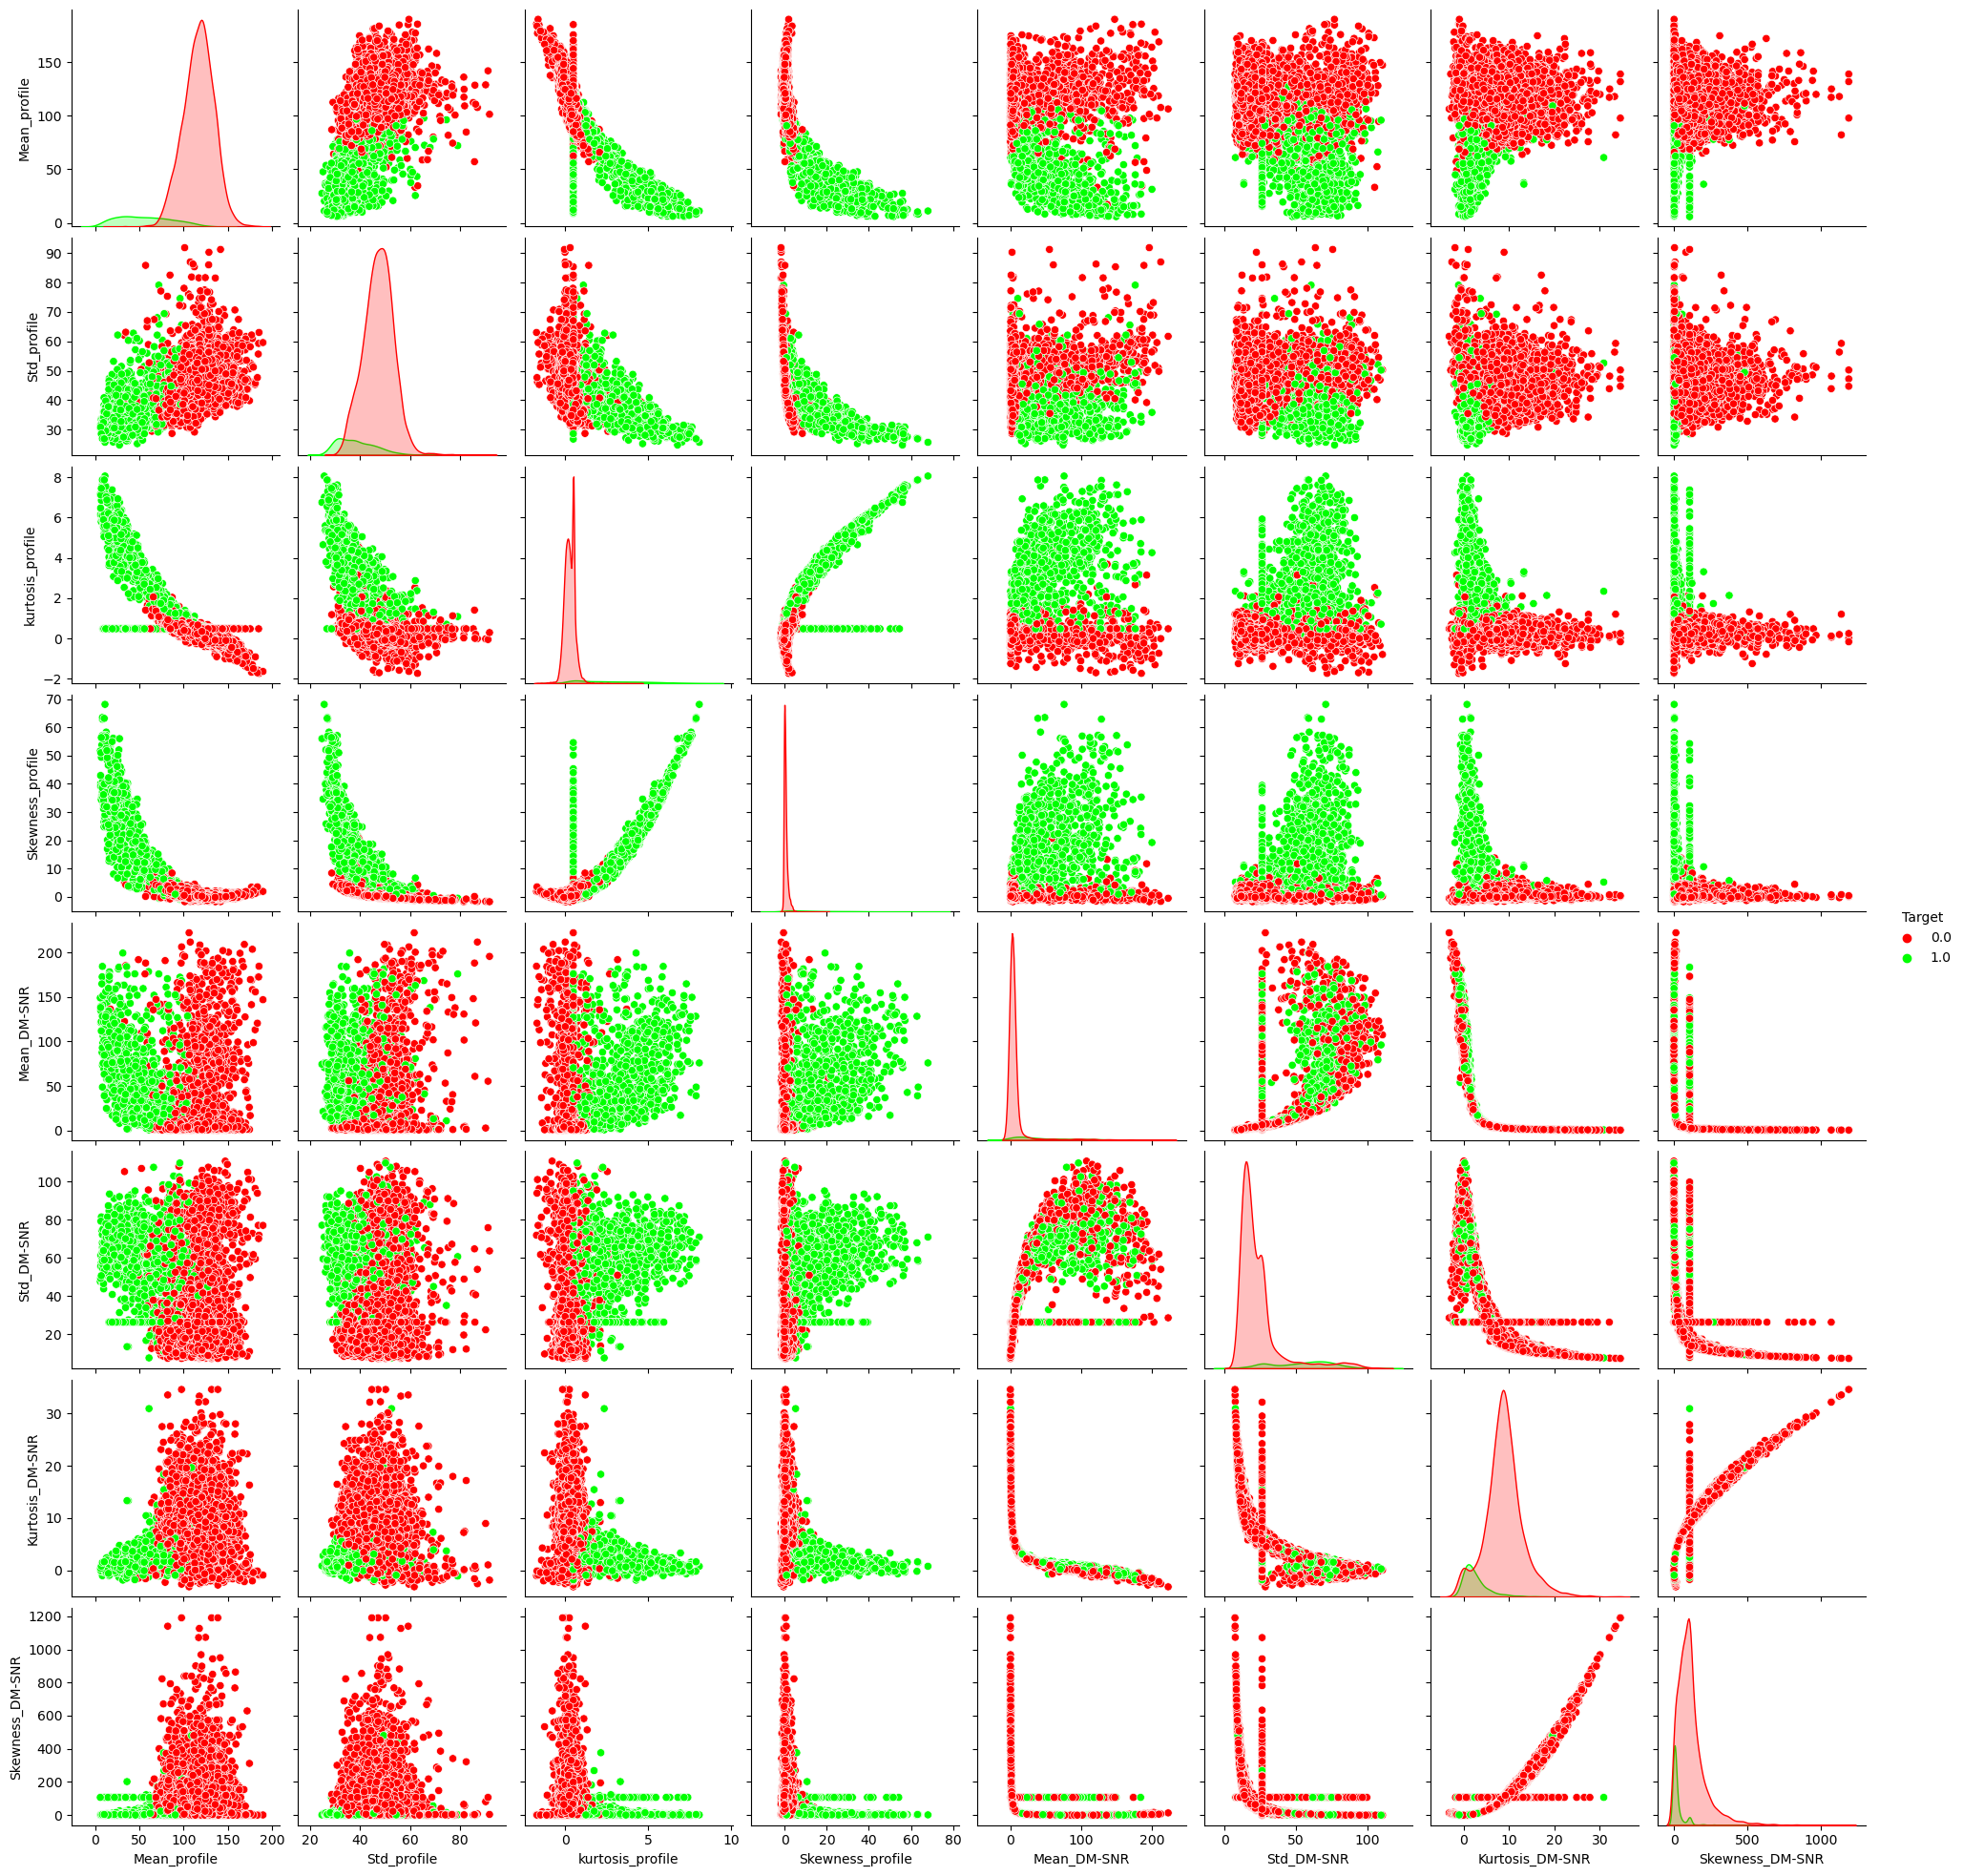

In [14]:
sns.pairplot(data,hue="Target",palette=["red","lime"])

### 5.Boxplot of whole data

<AxesSubplot:>

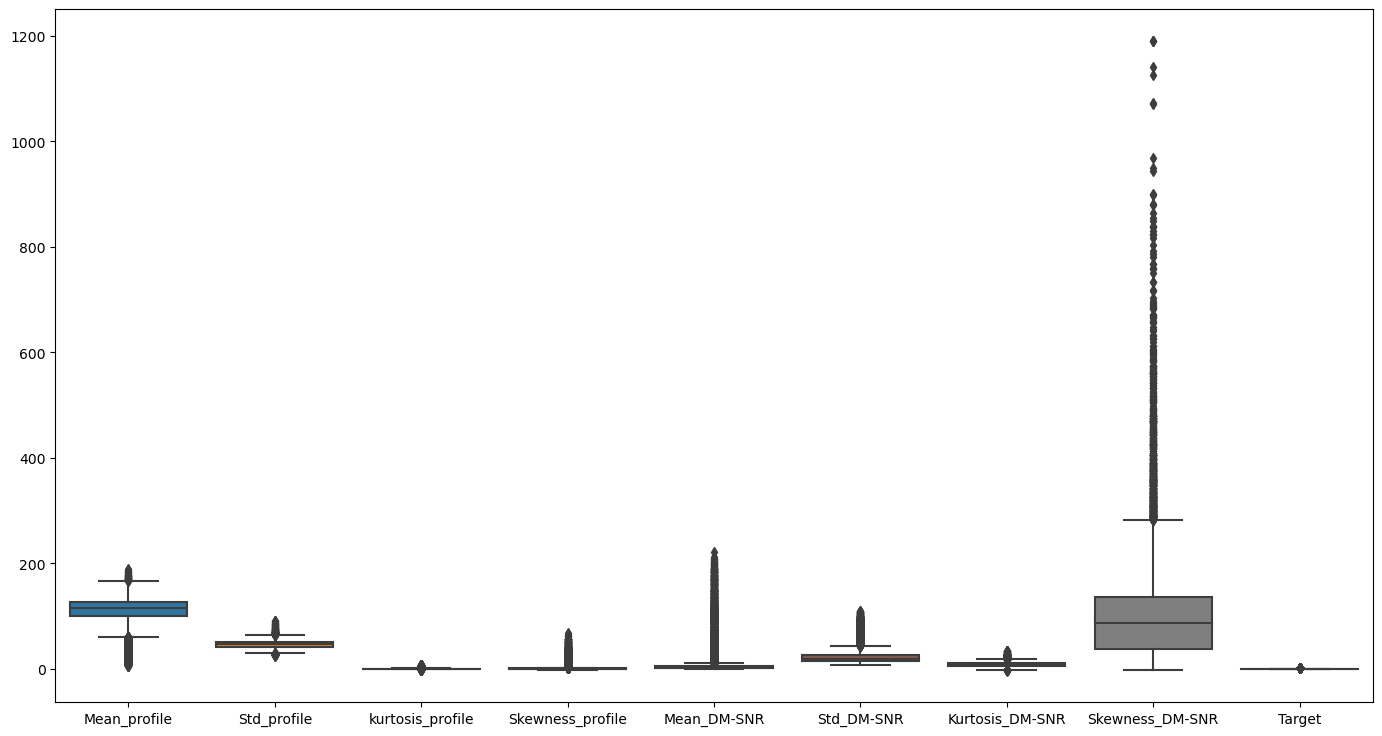

In [15]:
plt.figure(figsize=(17,9))
sns.boxplot(data = data)

### 6.Denity vs feature realtion

<AxesSubplot:xlabel='kurtosis_profile', ylabel='Density'>

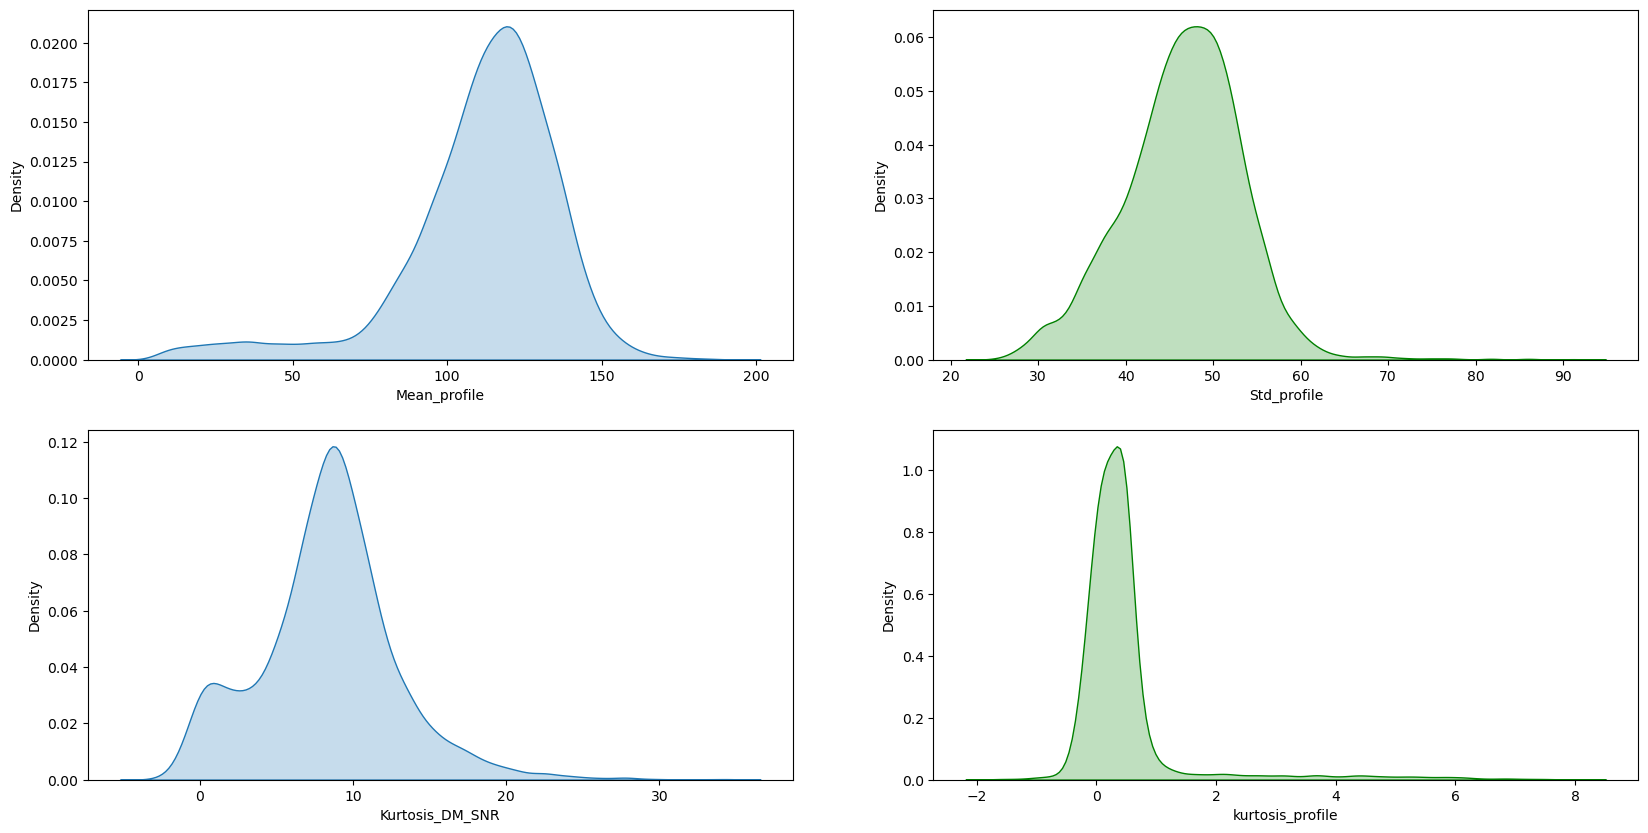

In [67]:
fig, axs  = plt.subplots(2, 2, figsize=(20, 10))

sns.kdeplot(data['Mean_profile'], shade=True, ax=axs[0][0])
sns.kdeplot(data['Std_profile'], shade=True, color='green', ax=axs[0][1])
sns.kdeplot(data['Kurtosis_DM_SNR'], shade=True, ax=axs[1][0])
sns.kdeplot(data['kurtosis_profile'], shade=True, color='green', ax=axs[1][1])

## 11.split the data into two

In [68]:
x=data.drop("Target",axis=1)
y=data["Target"]


Here the x denotes the features and y denotes the target in the data

## 12.Cross Validation

In this data,we have target.So we know that,it's an supervised machine learning.We have different machine learning classifier like Linear regression, logistic regression,decision tree,random forest,SVM.

But when we are dealing with a problem or a dataset , we will choose one of the classifier from these however,which one of them score better.So here we choose cross validation.



In [69]:
#import machine learing algorithms
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [70]:
log_score=cross_val_score(LogisticRegression(),X=x,y=y,cv=5)
svm_score=cross_val_score(SVC(),X=x,y=y)  
rf_score=cross_val_score(RandomForestClassifier(random_state=15),X=x,y=y)
knc_score=cross_val_score(KNeighborsClassifier(n_neighbors=10),X=x,y=y)
adboost_score=cross_val_score(AdaBoostClassifier(),X=x,y=y)

In [71]:
print(log_score)
print(svm_score)
print(rf_score)
print(knc_score)
print(adboost_score)

[0.97446129 0.97525938 0.97805267 0.9760479  0.97285429]
[0.9688747  0.97246608 0.96927374 0.97325349 0.97165669]
[0.97845172 0.98044693 0.97765363 0.97804391 0.97724551]
[0.97286512 0.97206704 0.971668   0.97205589 0.97285429]
[0.97605746 0.97845172 0.97805267 0.97924152 0.9752495 ]


In [72]:
#Finding the mean value of each algorithms.
print(np.mean(log_score))
print(np.mean(svm_score))
print(np.mean(rf_score))
print(np.mean(knc_score))
print(np.mean(adboost_score))

0.9753351079166489
0.9711049409560767
0.9783683391397572
0.9723020678515276
0.9774105739040675


From the above,we noticed the that RandomForsetClassifier is scored better.So we choose Randomforestclassifier as the classifier in this data.

## 13.Hypertuning

Find best parameters for Randomforestclassifier

commonly n_estimator is the parameter can be see in the randomforestclassifier.So we want to find the best value for n_estimator.

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
random_model=RandomForestClassifier()


GridSearchCV is a technique for finding the optimal parameter values from a given set of parameers in a grid.

In [24]:
gsv=GridSearchCV(random_model,{"n_estimators":[1,5,10,15,20,35]},cv=5,return_train_score=True)
gsv.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 5, 10, 15, 20, 35]},
             return_train_score=True)

In [25]:
gs_data=gsv.cv_results_
pd.DataFrame(gs_data)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031250,0.009882,0.003124,0.006248,1,{'n_estimators': 1},0.962091,0.960894,0.961692,0.968862,...,0.963682,0.002916,6,0.986031,0.986629,0.985632,0.986032,0.987628,0.986390,0.000696
1,0.123122,0.013783,0.009370,0.007650,5,{'n_estimators': 5},0.978053,0.975658,0.975658,0.978443,...,0.977012,0.001170,5,0.996009,0.996208,0.995011,0.996009,0.995810,0.995809,0.000419
2,0.253368,0.010552,0.004728,0.006271,10,{'n_estimators': 10},0.978452,0.976856,0.976457,0.980040,...,0.978049,0.001284,2,0.996109,0.997106,0.996508,0.995610,0.997705,0.996608,0.000736
3,0.462310,0.122153,0.017380,0.003312,15,{'n_estimators': 15},0.976856,0.977255,0.979250,0.978044,...,0.977650,0.000911,3,0.998603,0.998803,0.998603,0.998104,0.998104,0.998444,0.000286
4,0.478088,0.015939,0.015623,0.000007,20,{'n_estimators': 20},0.977255,0.977654,0.978053,0.978044,...,0.977570,0.000466,4,0.998703,0.999102,0.999202,0.998304,0.997905,0.998643,0.000487
5,0.965554,0.043524,0.031250,0.009885,35,{'n_estimators': 35},0.978452,0.979649,0.979649,0.978443,...,0.978767,0.000777,1,0.999302,0.999401,0.999900,0.999302,0.999302,0.999441,0.000233


From the above table,we can see the scores and parameters in each train and test wise.

Extract best score and best parameter from the above table.

In [26]:
gsv.best_score_

0.9787674451575701

In [27]:
gsv.best_params_

{'n_estimators': 35}

Here,we get that best parameter for n_estimators is equal to 35.

So,let's start machine learning classification by using RandomforestClassifier as algorithm and 35 as its n_esimator

## 14.RandomForestClassifier

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
#split the whole data for training and testing.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=43)


In [30]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [31]:
model=RandomForestClassifier(n_estimators=35,random_state=43)
model.fit(x_train,y_train)


RandomForestClassifier(n_estimators=35, random_state=43)

In [32]:
model.score(x_test,y_test)

0.975095785440613

In [33]:
y_pred=model.predict(x_test)
pd.DataFrame({"True y value":y_test,"predicted y value":y_pred})

,True y value,predicted y value
7895,0.0,0.0
10483,0.0,0.0
5710,0.0,0.0
550,0.0,0.0
8802,0.0,0.0
...,...,...
8831,0.0,0.0
11002,0.0,0.0
3749,0.0,0.0
8806,0.0,0.0


18.Evaluating the model

In [34]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[2805,   18],
       [  60,  249]], dtype=int64)

<AxesSubplot:>

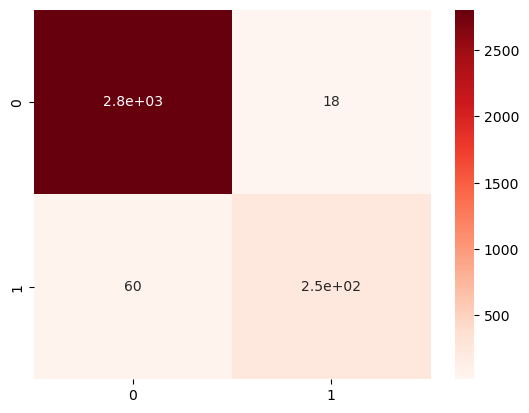

In [35]:
sns.heatmap(cm,annot=True,cmap="Reds")

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2823
         1.0       0.93      0.81      0.86       309

    accuracy                           0.98      3132
   macro avg       0.96      0.90      0.93      3132
weighted avg       0.97      0.98      0.97      3132



In [37]:
a=scale.transform([[95.0078125,40.21980546,0.3475781,1.153164381,2.77006689,18.21774119,7.85120501,70.80193775
]])
a

array([[-0.62745125, -0.92764037, -0.12725771, -0.09859798, -0.33316392,
        -0.43499267, -0.10481436, -0.33260524]])

In [38]:
model.predict(a)

array([0.])

## 15.Predict the star is pulser or not.

Here the values given in the particular coloumn and find the result.Here the data is binary classification,ie; 1 is true and 0 is false.In this case 1 implies the star is pulser and 0 implies star is not pulser.

Here we giving the values for Mean profile,Std_profile,kurtosis_profile,Skewness_profile,Mean_DM-SNR,Std_DM-SNR,Kurtosis_DM-SNR,Skewness_DM-SNR respectively.Then we get the target as per our request.

LET'S CHECK THE STAR IS PULSER OR NOT

We can't choose the values of each features as our wish, because scientist already founded it.So we have a data based on the values of features.Let's predict them.

In [39]:
test_data=pd.read_csv("pulsar_data_test.csv")
test_data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN
...,...,...,...,...,...,...,...,...,...
5365,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,NaN
5366,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,NaN
5367,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978,NaN
5368,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,NaN


In [40]:
#finding null values
test_data.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile        767
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve           524
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     244
target_class                                     5370
dtype: int64

In [41]:
#giving same coloumn name as in trained dataset
test_data.columns=["Mean_profile","Std_profile","kurtosis_profile","Skewness_profile","Mean_DM-SNR","Std_DM-SNR","Kurtosis_DM-SNR","Skewness_DM-SNR","Target"]
test_data.head(10)

,Mean_profile,Std_profile,kurtosis_profile,Skewness_profile,Mean_DM-SNR,Std_DM-SNR,Kurtosis_DM-SNR,Skewness_DM-SNR,Target
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN
5,85.476562,38.052793,NaN,1.915097,2.637124,NaN,9.001500,NaN,NaN
6,120.203125,46.946339,0.028301,0.227984,2.925585,15.006252,8.077168,91.100734,NaN
7,131.921875,48.328564,NaN,0.071303,4.380435,26.619201,6.530845,43.515761,NaN
8,124.078125,50.514789,0.241397,-0.433412,2.459030,17.354146,8.790638,86.443885,NaN
9,115.789062,55.597135,-0.030940,-0.688146,2.112876,11.902606,10.952806,184.479712,NaN


In [42]:
test_data1=test_data.drop("Target",axis=1)
test_data1

,Mean_profile,Std_profile,kurtosis_profile,Skewness_profile,Mean_DM-SNR,Std_DM-SNR,Kurtosis_DM-SNR,Skewness_DM-SNR
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268
...,...,...,...,...,...,...,...,...
5365,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390
5366,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028
5367,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978
5368,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616


In [43]:
#finding mean values in each features
d1=test_data1["kurtosis_profile"].mean()
print(d1)
d2=test_data1["Std_DM-SNR"].mean()
print(d2)
d3=test_data1["Skewness_DM-SNR"].mean()
print(d3)

0.4836759391581582
26.425371322595126
102.86908809012918


In [44]:
#fill the null values with their mean value
test_data1["kurtosis_profile"]=test_data1["kurtosis_profile"].fillna(d1)
test_data1["Std_DM-SNR"]=test_data1["Std_DM-SNR"].fillna(d2)
test_data1["Skewness_DM-SNR"]=test_data1["Skewness_DM-SNR"].fillna(d3)

In [45]:
test_data1.isna().sum()

Mean_profile        0
Std_profile         0
kurtosis_profile    0
Skewness_profile    0
Mean_DM-SNR         0
Std_DM-SNR          0
Kurtosis_DM-SNR     0
Skewness_DM-SNR     0
dtype: int64

In [46]:
df=scale.transform(test_data1)
target=model.predict(df)
target

array([0., 1., 0., ..., 0., 0., 0.])

In [47]:
test_data1["target"]=target
test_data1

,Mean_profile,Std_profile,kurtosis_profile,Skewness_profile,Mean_DM-SNR,Std_DM-SNR,Kurtosis_DM-SNR,Skewness_DM-SNR,target
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,0.0
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,1.0
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,0.0
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,0.0
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,0.0
...,...,...,...,...,...,...,...,...,...
5365,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,0.0
5366,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,0.0
5367,136.171875,48.924385,0.483676,0.063227,2.810201,18.695230,7.848577,69.388978,0.0
5368,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,0.0


In [51]:
test_data1.head(20)

,Mean_profile,Std_profile,kurtosis_profile,Skewness_profile,Mean_DM-SNR,Std_DM-SNR,Kurtosis_DM-SNR,Skewness_DM-SNR,target
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,0.0
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,1.0
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,0.0
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,0.0
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,0.0
5,85.476562,38.052793,0.483676,1.915097,2.637124,26.425371,9.001500,102.869088,0.0
6,120.203125,46.946339,0.028301,0.227984,2.925585,15.006252,8.077168,91.100734,0.0
7,131.921875,48.328564,0.483676,0.071303,4.380435,26.619201,6.530845,43.515761,0.0
8,124.078125,50.514789,0.241397,-0.433412,2.459030,17.354146,8.790638,86.443885,0.0
9,115.789062,55.597135,-0.030940,-0.688146,2.112876,11.902606,10.952806,184.479712,0.0


In [ ]:
116.906250	48.920605	0.186046	-0.129815	3.037625	17.737102	8.122621	78.813405	
75.585938	34.386254	2.025498	8.652913	3.765050	21.897049	7.048189	55.878791

87.398438	44.428724	0.483676	1.945321	19.089465	52.506294	2.921471	7.584978

115.789062	55.597135	-0.030940	-0.688146	2.112876	11.902606	10.952806	184.479712


In [52]:
scale.transform([[116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405]])

array([[ 0.22343658,  0.34763001, -0.29137488, -0.30522275, -0.32403756,
        -0.46088931, -0.04429043, -0.25404817]])

In [53]:
scale.transform([[75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791]])

array([[-1.38210951, -1.78266011,  1.57751466,  1.10924203, -0.29922524,
        -0.23675314, -0.2838815 , -0.47893533]])

In [54]:
scale.transform([[87.398438,44.428724,0.483676,1.945321,19.089465,52.506294,2.921471,7.584978]])

array([[-0.92312185, -0.31074199,  0.01101822,  0.02897942,  0.22348749,
         1.41245989, -1.20411172, -0.9524841 ]])

In [55]:
scale.transform([[115.789062,55.597135,-0.030940,-0.688146,2.112876,11.902606,10.952806,184.479712]])

array([[ 0.18002702,  1.32620455, -0.5118334 , -0.39514237, -0.35558057,
        -0.77524946,  0.58682169,  0.7820711 ]])

In [48]:
# Mean_profile=float(input("Enter Mean_profile value:"))
# Std_profile=float(input("Enter Std_profile value:"))
# kurtosis_profile=float(input("Enter kurtosis_profile value:"))
# Skewness_profile=float(input("Enter Skewness_profile value:"))
# Mean_DM_SNR=float(input("Enter Mean_DM_SNR value:"))
# Std_DM_SNR=float(input("Enter Std_DM_SNR value:"))
# Kurtosis_DM_SNR=float(input("Enter kurtosis_DM_SNR value:"))
# Skewness_DM_SNR=float(input("Enter Skewness_DM_SNR value:"))



In [49]:
# Result=model.predict([[Mean_profile,Std_profile,kurtosis_profile,Skewness_profile,
#                       Mean_DM_SNR,Std_DM_SNR,Kurtosis_DM_SNR,Skewness_DM_SNR]])
# print(Result)

In [50]:
#exampe 1. for pulser star
ps=scale.transform([[36.7109375,38.26024216,4.363306569,20.29698008,107.2123746,74.62119531,0.115883054,-0.819637695
]])
model.predict(ps)

array([1.])

## 16.Conclusion

After solving this problem using RandomForestClassifier,that is;supervised machine learning,we have to come to the following conclusions.


->>Our machine learning model predict very well wether a signal comes from  pulser or another external    source.

->>We can separate the data into two,ie;pulser star and not pulser,our model has worked very well.

->>Here we got a good accuracy score after the  preprocessing of our data.Here we get accuracy score as 97% above.It implies that our prediction is very well.

->>There are some features that are really seperated as we have explained when plotting the viloins.It could be easy to predict the target class just by looking at a sample if some values where below or above the mean value.

